# Fiona O'Riordan 29 November 2019

## Module 52446 2019 Fundamentals of Data Analysis  

## Assignment: Tips


![tips-gratuities.jpg](tips-gratuities.jpg)

## 1. Introduction

This repository is my submission for Project 2019, Module 52446: Fundamentals of Data Analysis. The project is an exploration and analysis of the python seaborn tips data set using the python packages seaborn and jupyter notebook. The project sets out to answer the following key questions about the tips dataset:

Key Questions: 
1. What does the tips dataset consist of?
2. Who tends to pay?
3. What the busiest times of the restaurant?
4. When are you most likely to earn the best tips?
5. What is the relationship between tips and bill amount?
6. What is the relationship between tip percentage and bill amount?
4. How do the factors sex and smoker influence tips? 
8. How do sex and smoker variables influence tip percentage?
9. Whats the most common table size?
10. What other factors influence tip amount?
11. Are there any other interesting facts about the diners or restaurant?

The project begins with section **2. A Description of the Tips Dataset**. This section loads the dataset, explores the data set, provides a statistical overview of the dataset and uses seaborn plots to highlight some interesting points about the data such as who tends to pay, when was the restaurant busiest and do the busiest time generate the most tips. The next section **3 The Relationship between Tips & Bill Amount (Regression):**
uses regression to explore the relationship between tips & bill amount and then the relationship between percentage tips and bill amount. Then, Section **4 Analysis: The influence of Variables Smoking and Sex on Tips**  analyses the influence of variables smoking and sex on the relationship between tip and bill amount and similarly the influence on tip percent and bill amount. It also looks at any other factors that might influence tip amount. Then, Section **5 Additional Analysis** looks at the bill per diner and tip per diner and then the most frequent party size. A summary of the key findings will be listed. Finally, appropriate references used throughout will be documented.



## 2. A Description of the Tips Dataset.

### 2.1 Load the data

First lets load the seaborn tips database.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Taken from : https://stackoverflow.com/a/47955814 
# Adjusting the figure size of seaborn plots in this notebook
sns.set(rc={'figure.figsize':(10,7)})
df = sns.load_dataset('tips')


### 2.2 Explore the data

Now we can begin to explore the data. We can see from the info function that we have 244 entries and 7 columns in the dataset. The first two columns, 'total_bill' and 'tip' are datatype float64. Columns 'sex', 'smoker', 'day' and 'time' are all category columns. The last column 'size' has datatype int64.  All of the columns are non-null. The Index ranges from 0 to 243.

In [2]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### 2.2 A quick look

The function df.head() shows us the fist 5 entries in the database. 

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Similarly, the function df.tail() shows us the last 5 entries in the database.

In [4]:
df.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 2.3 A Statistical Overview

The describe function gives us a statistical overview of the database for each of the numerical columns. We can see that we have 244 entries with no missing values. 

This function shows the average bill is almost $20 ($19.785943) with a standard deviation of 8.902412, the average tip is almost $3 ($2.998279) with a standard deviation of 1.38 (1.383638) and the average party size is 2.56 ($2.569672) with a standard deviation of 0.951100. The average number of diners per party are 2.56 (2.569672).
For each of the three numerical variables/attributes the min (the minimum value of the variable), max (the maximum value of the variable) and the percentiles 25%, 50% and 75% ( the nth percentile is the lowest value that is greater than n% of the values in a particular attribute) are calucated and shown below:

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 2.4 A Statistical Overview by Gender 

We can also generate a statistical overview for the numerical attributes by gender. We can see from the below tables that that more males (157) paid the bill than females(87). Men paid on average a higher tip (3.089618) than women (2.833448). However, men also paid on average higher bills $20.744076 versus an average bill of 18.056897 paid by women. 


In [6]:
(df.loc[df.loc[:,'sex']=='Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [7]:
(df.loc[df.loc[:,'sex']=='Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


The data shows that men were more likely to pay the bill than women. Since we only know the gender of the bill payer we cannot determine whether men were more likely to pay because more diners were men or whether men are just more likely to be the bill payer. 

However, we can invesitage the relationship between bill payer gender and other variables. This leads us to our first analysis, the bill payers.

### 2.5 Who tends to pay?:



Firstly, lets look at the relationship between party size & bill payer. "Number of Bills Paid by Size & Gender" shows overall for each of the party sizes greater than 1, men are more likely to be the bill payer with the exception of party sizes equal to 6 where the number of male and female bill payers is equal.

<Figure size 432x288 with 0 Axes>

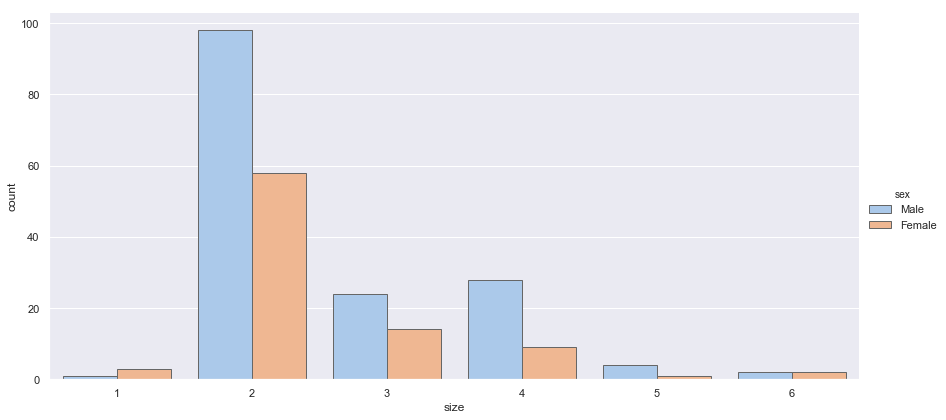

In [60]:
# create a figure & plot.
fig = plt.figure()

# Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html
ax = sns.catplot (x="size", hue="sex", kind="count",
            palette="pastel", edgecolor=".4",  height=6, aspect=2,
            data=df)
#Adding a title at the figure level
fig.suptitle("Number of Bills Paid by Size & Gender", fontsize = 20)
# display the plot

plt.show()



Secondly, we see from "Bills Paid by Gender during the Weekend/Week" that men are more like to pay at the weekend.

<Figure size 432x288 with 0 Axes>

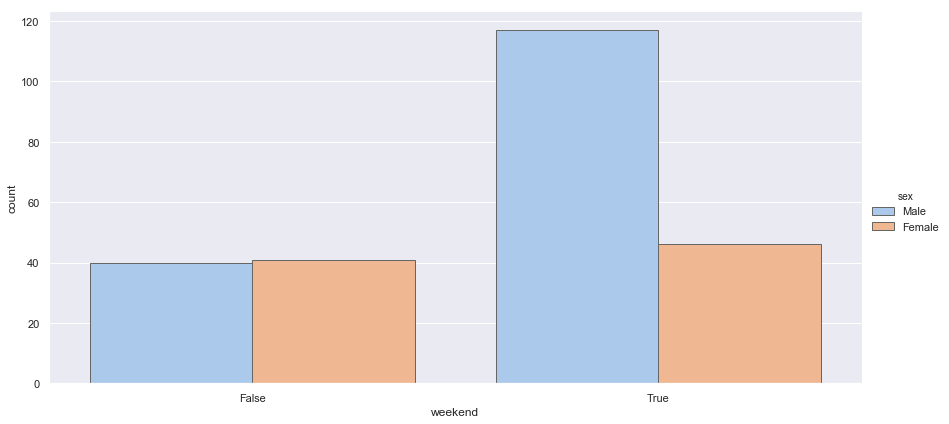

In [9]:
#Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html
df["weekend"] = df["day"].isin(["Sat", "Sun"])

# create a figure & plot.
fig = plt.figure()

ax = sns.catplot (x="weekend", hue="sex", kind="count",
            palette="pastel", edgecolor=".4",  height=6, aspect=2,
            data=df)

#Adding a title at the figure level
fig.suptitle("Bills Paid by Gender during the Weekend/Week", fontsize = 20)
# display the plot
plt.show()

Thirdly, we see from "Bills Paid by Time by Gender" that men are more likely to pay for dinner than lunch.

<Figure size 432x288 with 0 Axes>

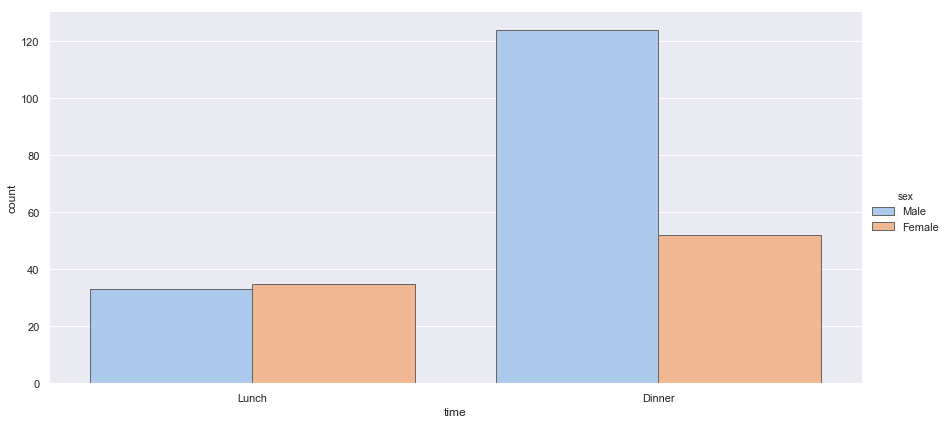

In [10]:
# Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html
# create a figure & plot.
fig = plt.figure()

ax = sns.catplot (x="time", hue="sex", kind="count",
            palette="pastel", edgecolor=".4",  height=6, aspect=2,
            data=df)

#Adding a title at the figure level
fig.suptitle("Bills Paid by Time by Gender", fontsize = 20)
# display the plot
plt.show()

## 2.6 When was the restaurant busiest?

### Lunchtime Thursday: 
The busiest day for lunch was Thursday with 61 tables served and 150 diners. In comparision, Friday was a quiet day for lunch with only 7 tables servered and 14 diners. At the weekend, either no diners appeared for lunch, lunch was not served or no data was collected. 
### Dinnertime Weekend: 
The Thursday and Friday were very quite days for dinner with only 1 table, 2 diners and 12 tabels, 26 diners respectively.  In comparision the weekend was very busy for dinner with 87 tables, 219 diners on Saturday evening and 76 tables, 216 diners on Sunday evening.

### The Busiest Time:
The restaurant was most busy then on Saturday dinner time  with 219 diners at 87 tables and was followed closeby by Sunday evening with 216 diners at 76 tables.

### The Busiest Day:
The busiest day to work is a Saturday followed by Sunday. 

### The Quietest Day: 
There were only 19 tables with just 40 diners served in total served on Friday. 

Figure "Number of Diners by Day and by Time" and its underlying data summary visualise this information:

 

In [11]:
# #create dataframe grouping by day & time, sum of the party size, reset the index
df_grp1 = df.groupby(['day','time'])['size'].sum().reset_index()
df_grp1

,day,time,size
0,Thur,Lunch,150
1,Thur,Dinner,2
2,Fri,Lunch,14
3,Fri,Dinner,26
4,Sat,Dinner,219
5,Sun,Dinner,216


/Users/fionaoriordan/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/Users/fionaoriordan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


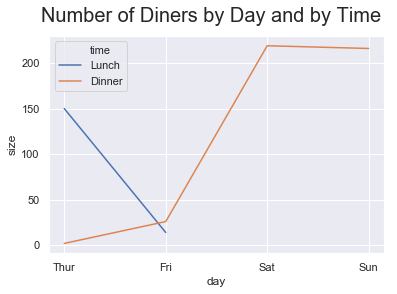

In [61]:
# Adapted from https://seaborn.pydata.org/generated/seaborn.lineplot.html
# create a figure & plot.
fig = plt.figure()

# create a seaborn line plot ax of dataframe df_grp1 
# with xaxis = day, y axis = size, hue = 'time'
ax = sns.lineplot(x='day', y='size', hue = "time", data=df_grp1)

#Adding a title at the figure level
fig.suptitle("Number of Diners by Day and by Time", fontsize = 20)
# display the plot
plt.show()


## 3.3 The busiest days are the best days for tips.

The busiest days are the best days for tips (See Sum of Tips by Day & by Number of Diners ) and in parallel  the busiest days generate the largest revenue (See Sum of Bills by Day & by Number of Diners). :

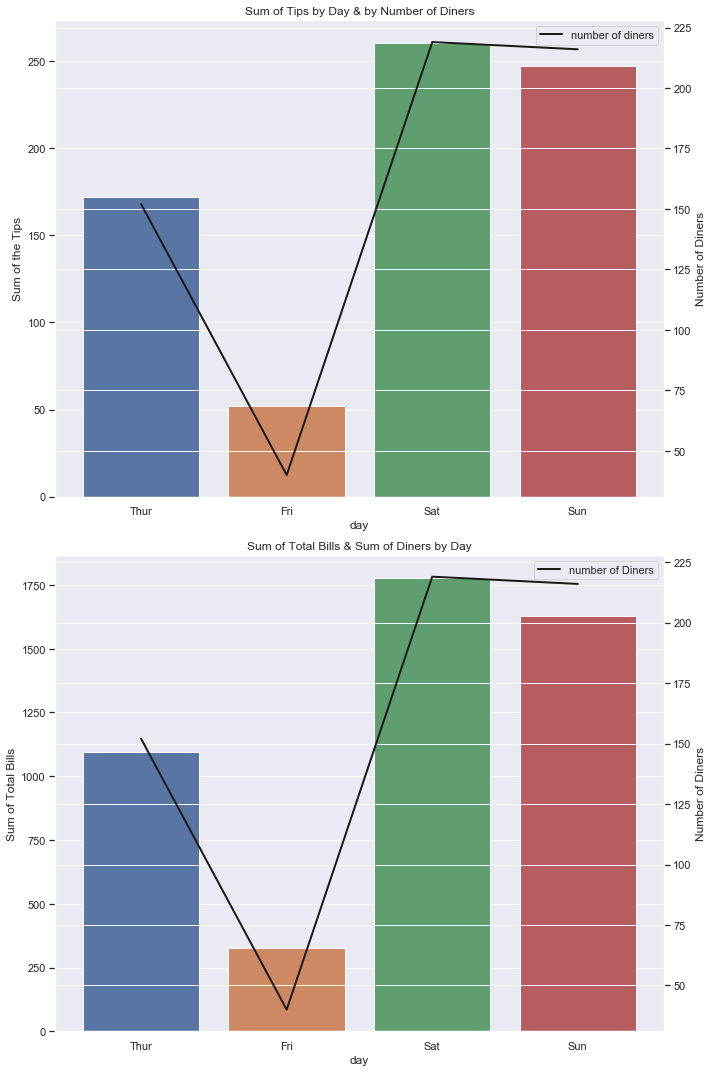

In [13]:
#Adapted from : https://stackoverflow.com/a/56881800
#create groupby dataframe grouping by day & sum of the tips, reset the index.
df_grp2 = df.groupby(['day'])['tip'].sum().reset_index()

#create groupby dataframe grouping by day & size of the tips, reset the index but not time
# in order to avoid x multiple points for Thursday & Friday
df_grp4 = df.groupby(['day'])['size'].sum().reset_index()

#create a figure
plt.figure(1, figsize=(10,15))
#create a subplot
plt.subplot(211)

#create a bar plot for df_grp2 .i.e. plot sum of the tips on y axis 2 by day
# Create barplot with the sum of the tips by day.
axa = sns.barplot(x='day', y='tip', 
                  #ci=None, estimator=sum,
                  data=df_grp2 
                  )
#  set the y label for axa plot
axa.set(ylabel='Sum of the Tips')
axa.set_title('Sum of Tips by Day & by Number of Diners')
# Adapted from : https://stackoverflow.com/a/47592107
#df_grp2 and df_grp3 plots share the same x axis but different y axis.
# create a twin plot of axa and called it axb
axb = axa.twinx()
#create a line plot for df_gp1 .i.e. plot sum of the tips on y axis 1 by day
axb = sns.lineplot(x = "day", y = "size", color="k", linewidth=2, 
                   label = 'number of diners', 
                   #ci=None, estimator=sum,
                   data = df_grp4)
# labeling the y axis for axb lineplot
axb.set(ylabel='Number of Diners')
# Using tight_layout to avoid overlap
# as per http://matplotlib.org/users/tight_layout_guide.html#plotting-guide-tight-layout
plt.tight_layout()
 

#create a dataframe df_3 grouping sum of the total_bill by day
df_3 = df.groupby(['day'])['total_bill'].sum().reset_index()



plt.figure(1)
#create a second subplot 
plt.subplot(212)
#create a bar plot for df_grp2 .i.e. plot sum of the tips on y axis 2 by day
# Create barplot with the sum of the tips by day.
axc = sns.barplot(x='day', y='total_bill', 
                  #ci=None, estimator=sum,
                  data=df_3 
                  )
#  set the y label for axa plot
axc.set(ylabel='Sum of Total Bills')

# Adapted from : https://stackoverflow.com/a/47592107
#df_grp2 and df_grp3 plots share the same x axis but different y axis.
axd = axc.twinx()
#create a line plot for df_gp1 .i.e. plot sum of the tips on y axis 1 by day
axd = sns.lineplot(x = "day", y = "size", color="k", linewidth=2, 
                   label = 'number of Diners', 
                   #ci=None, estimator=sum,
                   data = df_grp4)

axd.set(ylabel='Number of Diners')
# create a twin plot of ax1 and called it ax2
axd.title.set_text('Sum of Total Bills & Sum of Diners by Day')



plt.tight_layout()

#tidy up the display
plt.show()
 
#TO DO ****************************
# Create one output to show df_grp2 & df_grp4
# ********************************************
#print(df_3)
#print(df_grp4)

 
#TO DO ****************************
# Create one output to show df_grp2 & df_grp4
# ********************************************
#print(df_grp2)
#print(df_grp4)


From a total tips generated perpective, the best days to work are Saturday & Sunday when there are the most customers and the highest sum total of bills:

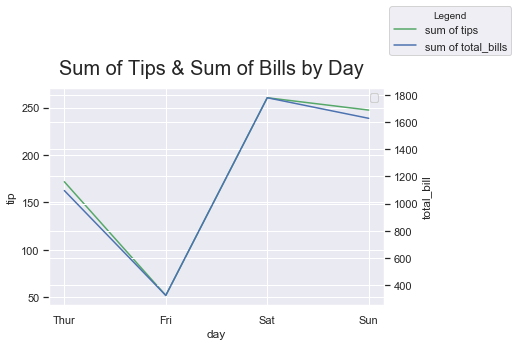

In [14]:
# create a data frame to tip by day
df_2 = df.groupby(['day'])['tip'].sum().reset_index()
# create another data frame to sum bill by day
df_3 = df.groupby(['day'])['total_bill'].sum().reset_index()

#create a figure
fig = plt.figure()
# Adapted from : https://stackoverflow.com/a/47592107
#create a line plot for df_2 .i.e. plot sum of the tips on y axis 1 by day
ax1 = sns.lineplot(x = "day", y = "tip", color="g", label = 'sum of tips', data = df_2)
# create a twin plot of ax1 and called it ax2
ax2 = ax1.twinx()
#create a line plot for df_3 .i.e. plot sum of the total_bills on y axis 2 by day
#df_2 and df_3 plots share the same x axis but different y axis.
ax2 = sns.lineplot(x = "day" , 
                   y = "total_bill", 
                   color="b", 
                   label = 'sum of total_bills', 
                   data = df_3)

# Adapted from : https://stackoverflow.com/a/56272576
# Adding these lines of code so that legend is only visible at fig level. 
# Otherwise you end up with ax1 legend appearing but not ax2 legend at the ax level
ax1.legend('')
ax2.legend('')

#Adapted from : https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo
#Adding a legend at the figure level
fig.legend(loc='upper left', bbox_to_anchor=(1,1.4), 
           bbox_transform=ax1.transAxes, title='Legend')
#Add a figure title & adjust font size 
fig.suptitle("Sum of Tips & Sum of Bills by Day", fontsize = 20)

#tidy up the display
plt.show()




# 3 The Relationship between Tips & Bill Amount (Regression):



## 3.1 The relationship between tips & total_bill.

We can plot and apply a simple linear regression line to the data to see the relationship between tips ("tip") and bill amount ("total_bill").

We can see in Figure "Tip by Bill Scatter & Regression Line Plot" that the total_bill increases the tip also tends to increase. 

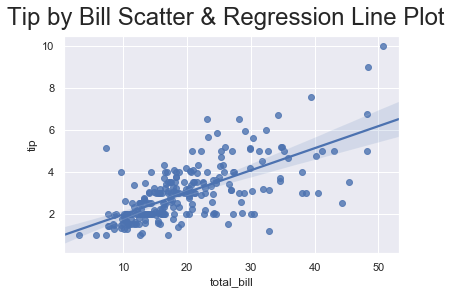

In [15]:
# setting the colour codes
ax1 = sns.set(color_codes=True)
#http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=reg
# Create a seaborn regplot for total_bill, tip, data equal to df
ax1 = sns.regplot(x="total_bill", y="tip", data=df)

# Adding a title
ax1.figure.suptitle("Tip by Bill Scatter & Regression Line Plot", fontsize = 24)
# display the plot.
plt.show()


## 3.2 Percentage Tips paint a different picture:

So far, we have  compared tip amount (tip) with bill amount (total_bill). Since none of the  tip values are NULL (NaN) in the dataset. We might therefore assume that tipping is customary.  According to Wanderlustingk.com (2018), tips in the US are a given and based on percentage of the total bill with 15% a general standard, but 18-25% of the total bill an acceptable rule to use.

So it would be useful now to take another look at the relationship between tip and bill amount but replace tip with tip as a percentage of bill_total. 

To do so, first we create a new column in the dataframe called tip_pct. This new column is simply tips expressed as a percentage of the total_bill for each observation.



In [16]:
#create a column to calcuate tip%
df['tip_pct'] = 100 * df['tip'] / df['total_bill']

# take a peek
df.head()

,total_bill,tip,sex,smoker,day,time,size,weekend,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,True,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,True,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,True,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,True,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,True,14.680765


Unfortunately, for the waiters, we can now see that as the total bill increases the tip percentage tends to decrease (See 'Tip percentage versus total bill') and likewise, as the size of the party increases so does the tendancy for the tip percentage to also decrease (See 'Tip percentage versus Party Size'):

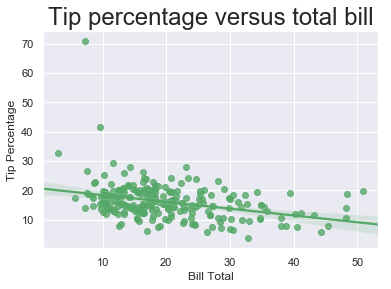

In [17]:

#create a figure
fig = plt.figure()
#http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=reg
# Create a seaborn simmple regression plot to tip percentage versus total bill
ax = sns.regplot(x="total_bill", y="tip_pct", color = 'g',
                  data=df)
# Label the axis
ax.set(xlabel='Bill Total', ylabel='Tip Percentage')
ax.set_title('Tip percentage versus total bill', fontsize = 24)
plt.show()




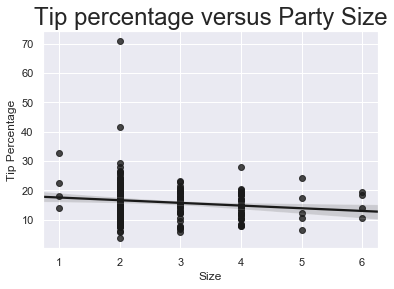

In [64]:
#http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=reg
#create a figure
fig = plt.figure()
# Create a seaborn simmple regression plot to tip percentage versus total bill
ax = sns.regplot(x="size", y="tip_pct", color = 'k',
                  data=df)
# Label the axis
ax.set(xlabel='Size', ylabel='Tip Percentage')
ax.set_title('Tip percentage versus Party Size', fontsize = 24)
plt.show()

# 4 Analysis:

## 4.1 The influence of Variables Smoking and Sex on Tips:


We can also include the variable smoker & Sex and see how that might influence regression/the relationship between total_bill and tip.

### 4.1.1 Are smokers better  or worse tippers?

We can include the variable smoker also and see how that might influence the relationship between total_bill and tip. 

The below plot "Total Tip by Total Bill with Smoker variable included" shows how bill payers in non smoking parties tend to be more responsive in their tipping to increases in the bill . As the bill_total changes the bill payer in smokers parties  are less responsive in their tip increases than the bill_payer in non-smoking parties.

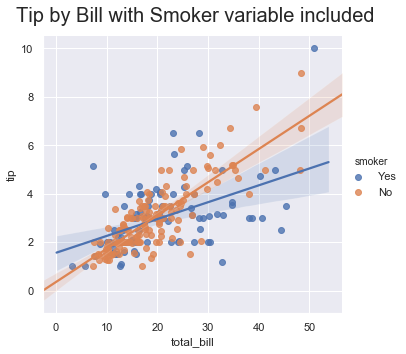

In [19]:
#adapted from http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=s
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g.fig.subplots_adjust(top=0.9)
# Adding a title
g.fig.suptitle("Tip by Bill with Smoker variable included", fontsize = 20)
plt.show()

### 4.1.2 Does gender influence the tip?

We can also see if the bill payer's gender influences the tip. 

"Tip by Bill with Gender variable included" shows that the relationship between tip and total_bill for both sexes is quite similar since regression lines below are quite similar. 


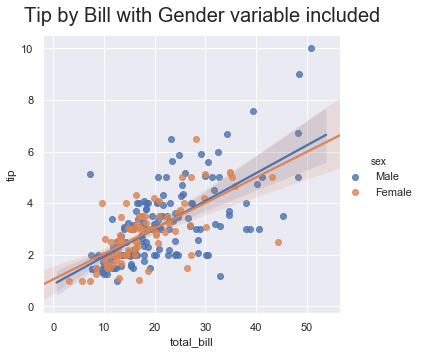

In [20]:
#adapted from http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=s
g2 = sns.lmplot(x="total_bill", y="tip",hue="sex", data=df)
#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g2.fig.subplots_adjust(top=0.9)

# Adding a title
g2.fig.suptitle("Tip by Bill with Gender variable included", fontsize = 20)
plt.show()

### 4.1.3 The influence of sex & smoker status on tips: a combined view.

We include both gender and smoker variables and we can clearly see that bill payers in non smokering parties by comparision to bill payers in smoking parties are more influenced by bill_total when tipping and again there is little to distinguish between male & female non smokers.

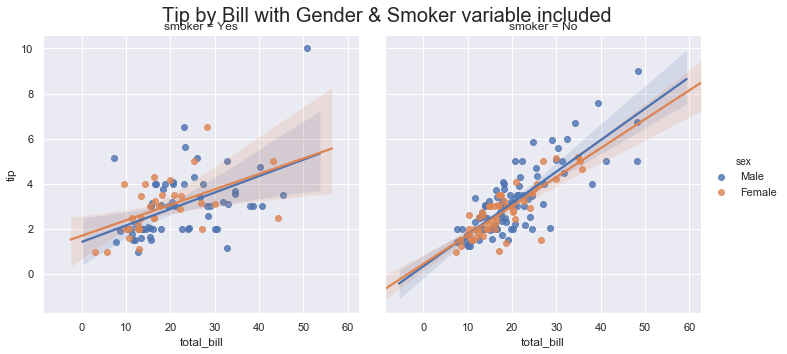

In [21]:
#adapted from http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=s
g3 = sns.lmplot(x="total_bill", y="tip", hue = 'sex', col = 'smoker', data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Tip by Bill with Gender & Smoker variable included", fontsize = 20)
plt.show()


## 4.2 The influence of sex & gender on  Percentage Tips:

So far, we have compared tip amount (tip) with bill amount (total_bill) and how the variables sex and smoker influence that relationship. 

So it would be now be useful  to take another look at these relationships but replace tip with tip as a percentage of bill_total.

### 4.2.1 Male smokers tend to use the most consistent percentage tip:

Then we can create figure "Tip Percentage by Bill with Gender & Smoker included" to show how the bill payer in smoking parties tend to downward adjust their tip percentage as the bill amount increases. While the bill payers in non-smoking parties also tend to downwardly adjust their percentage tip when as the bill amount increases, they tend to do so to a lesser degree. 

Non Smoking parties with a male bill payer tend to use the most consistent percentage tip.

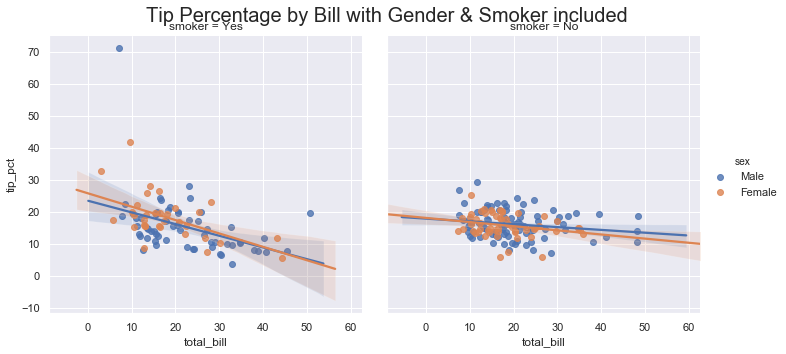

In [22]:
#adapted from http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=s
# create a seaborn lmplot 
g4 = sns.lmplot(x="total_bill", y="tip_pct", hue = 'sex', col = 'smoker', data=df)

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
g4.fig.subplots_adjust(top=0.9)
g4.fig.suptitle("Tip Percentage by Bill with Gender & Smoker included", fontsize = 20)
plt.show()

# 5. Additional Analysis:

## 5.1 Additional factors that influence tip amount?

First, lets calculate the bill per diner (bill_per_cust) and tip per diner (tip_per_cust):

In [33]:
#create a column to calcuate tip%
df['bill_per_cust'] = df['total_bill'] / df['size']
df['tip_per_cust'] = df['tip'] / df['size']
# take a peek
df.head()


,total_bill,tip,sex,smoker,day,time,size,weekend,tip_pct,bill_per_cust,tip_per_cust
0,16.99,1.01,Female,No,Sun,Dinner,2,True,5.944673,8.495000,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,True,16.054159,3.446667,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,True,16.658734,7.003333,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,True,13.978041,11.840000,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,True,14.680765,6.147500,0.902500


"Bill per Customer & Tip Per Customer" shows two interesting points. Firstly, there are clusters of tips per persons at 0.5, 1 and 1.5.  If we assume that each individual within  parties pays an equal amount then we can say that the most frequent individual tip amount is 1 and then 1 and 1.5 and perhaps tippers like these rounded amounts.


Text(0.5, 0.98, 'Bill per Customer & Tip Per Customer')

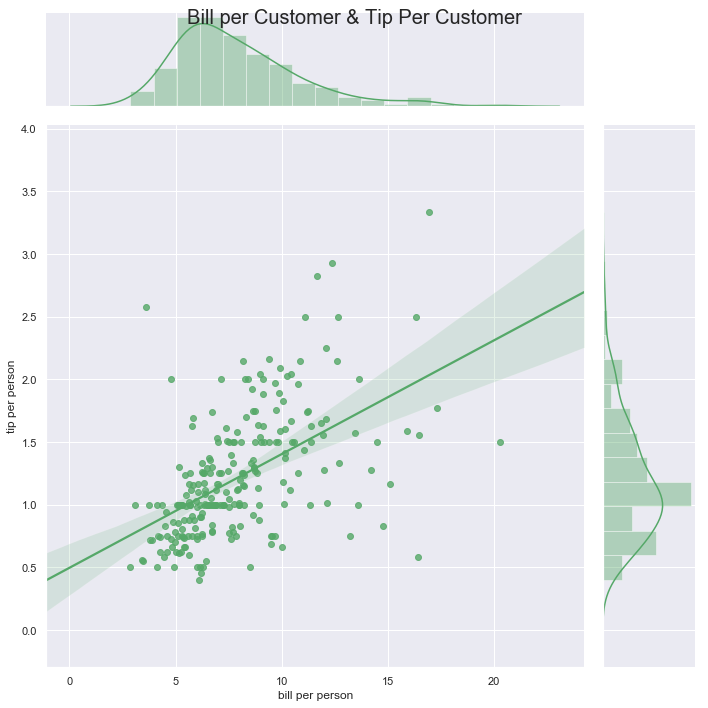

In [62]:

#Adapted from :https://seaborn.pydata.org/generated/seaborn.jointplot.html
ax = sns.jointplot(x = "bill_per_cust",
                     y= "tip_per_cust",
                    kind="reg", height=10, color="g", 
                    data = df).set_axis_labels("bill per person", "tip per person")
ax.fig.suptitle("Bill per Customer & Tip Per Customer", fontsize = 20)

## 5.2 Its a cheap restaurant or is the data old?

Secondly, "Bill per Customer & Tip Per Customer" above also shows that most of the individual bill amounts per customer fall between 5 and 10 dollars. Thats very cheap. One has to wonder about this restaurant or the data or perhaps this data is very old.



## 5.3 The most popular party size : Two's Company


Overall, by far the most frequent party size was 2 at both lunch time and dinner . The next most popular party size was 3 and then 4. The remaining party size 1, 5 and 6 were relatively infrequent. See figure "Overall Party Size" & "Party Size at Lunch & Dinner": 

Text(0.5, 0.98, 'Overall Party Size')

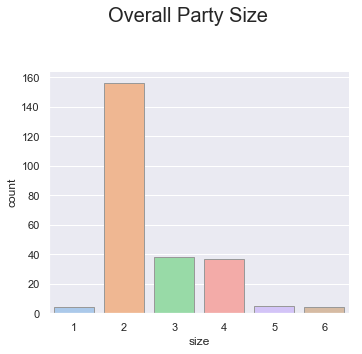

In [25]:
#Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html
#Creating a figure ax using seaborn category plot function 
ax = sns.catplot(x="size", kind="count",
            palette="pastel", edgecolor=".6", 
            data=df);

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.8)
# Adding a figure title with fontsize 20
ax.fig.suptitle("Overall Party Size", fontsize = 20)


Text(0.5, 0.98, 'Party Size at Lunch & Dinner')

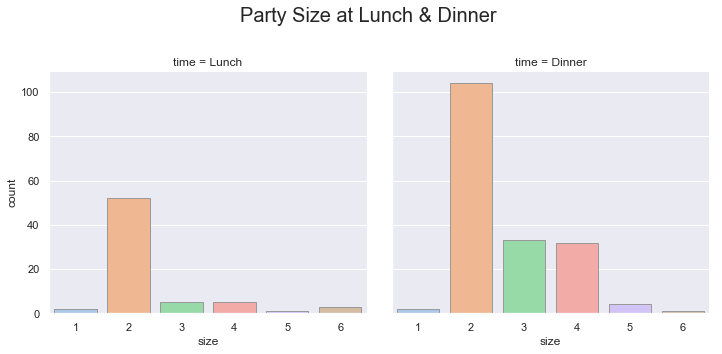

In [26]:
#Adapted from https://seaborn.pydata.org/generated/seaborn.catplot.html
#Creating a figure ax using seaborn category plot function 
ax = sns.catplot(x="size", kind="count",
            palette="pastel", edgecolor=".6", col = "time",
            data=df);

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.8)
# Adding a figure title with fontsize 20
ax.fig.suptitle("Party Size at Lunch & Dinner", fontsize = 20)




In addition, regardless of the day & time, the most popular table/party size was 2 as figure 'Party size for each Day & Time' shows:

Text(0.5, 0.98, 'Party size for each Day & Time')

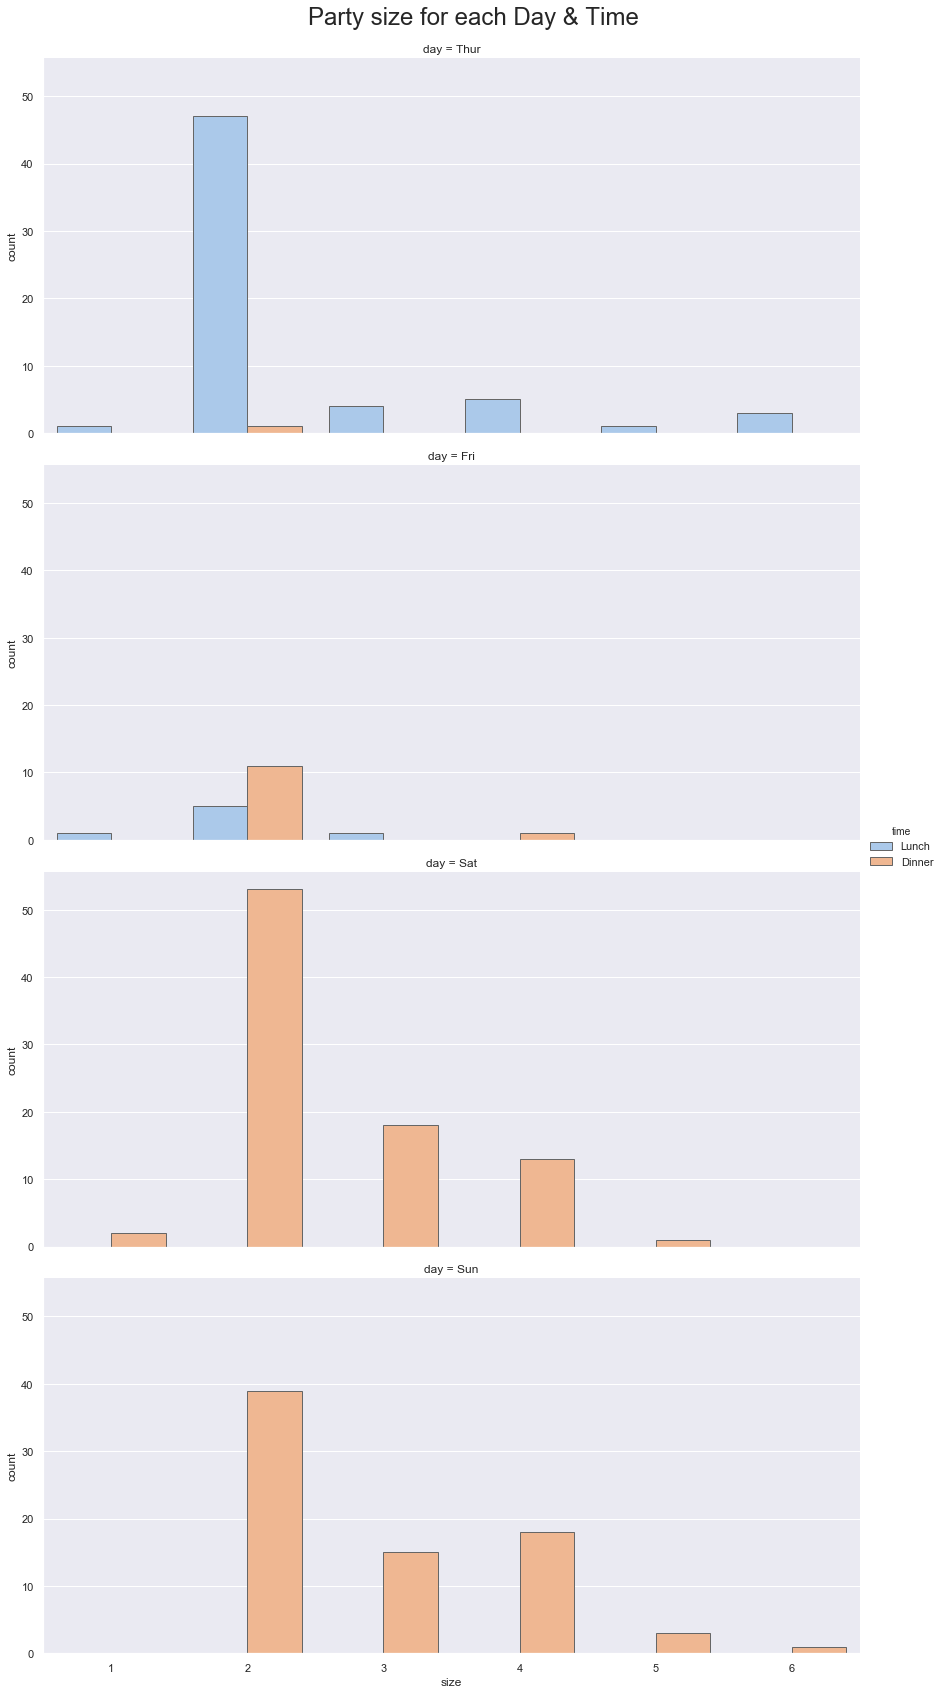

In [27]:
#https://seaborn.pydata.org/generated/seaborn.catplot.html 
ax1 = sns.catplot (x="size", hue="time", kind="count",
            palette="pastel", edgecolor=".4", row = "day", height=6, aspect=2,
            data=df);

sns.set(style="whitegrid", font_scale=1.5)
#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax1.fig.subplots_adjust(top=0.95)

# Adding a title
ax1.fig.suptitle("Party size for each Day & Time", fontsize = 24)



In fact, as the following calulation and pie chart so succintly show, almost two thirds of the total covers were for parties of 2:

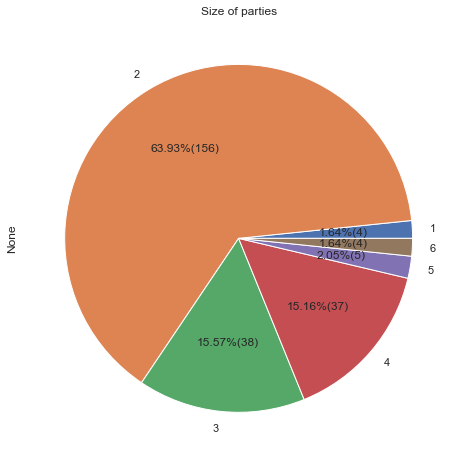

In [28]:
# Adapted from https://stackoverflow.com/a/54087182

import pandas as pd
import matplotlib.pyplot as plt

dfsize = df.groupby('size').size()

sns.set()
dfsize.plot(# create a pie chart
            kind='pie', 
            # set the title of the pie chart
            title='Size of parties', 
            # figure size
            figsize=[8,8], 
            # with the percent listed as a fraction
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*dfsize.sum()))
plt.show()


So almost two thirds of the business is made up of party sizes of 2.  

# Summary:

1. The average bill is almost 20 dollars, the average tip is almost 3 dollars the average party size is 2.56. 
2. Men paid on average a higher tip (3.089618) than women (2.833448). However, men also paid on average higher bills $20.744076 versus an average bill of 18.056897 paid by women.
3. Overall and when in company, men are more likely to be the bill payer with the exception of party sizes equal to 6 where the number of male and female bill payers is equal.
4. Men are more likely to be the bill payer at the weekend.
5. Men are also more likely to pay for dinner than lunch.
6. There was no data gathered for lunch at the weekend and this should be considered when interpreting the above 2 preceding points.
7. The restaurant was busier at the weekend with the businest time Saturday dinner. Thursday lunch time was the busiest time for lunch. There was no data recorded for weekend lunctime.
8. The busiest times generate the most revenue and tips.
9. As the party size and total bill increases the tip given also tends to increase.
10. However, as the total bill increases the percentage tip tends to decrease.
11. Bill payers in non smoking parties tend to be more responsive in their tipping to increases in the bill  but there is here is little to distinguish between male & female non smokers. 
12. Bill payers in smoking parties tend to downward adjust their tip percentage as the bill amount increases. Bill payers in non smoking parties also tend to downwardly adjust their percentage tip when as the bill amount increases but to a lesser degree. 
13. Non Smoking parties with a male bill payer tend to use the most consistent percentage tip.
14. If we assume that diners in parties tend to equally contribute to the overall tip amount, then the evidence suggests that diners frequently rounded their tip contribution to whole amounts 0.5, 1 and 1.5.  
15. Most of the bill amounts per customer fall between 5 and 10 dollars. Thats quite cheap.  One has to wonder about this restaurant or the data or perhaps this data is just old. 
16. Two was the most popular table size at each day & time.


# References:

Wanderlustingk.com, (2018) **Tipping in the USA** https://www.wanderlustingk.com/travel-blog/tipping-in-the-usa

Seaborn (undated) seaborn.boxplot 
https://seaborn.pydata.org/generated/seaborn.boxplot.html

Seaborn (undated) seaborn.catplot 
https://seaborn.pydata.org/generated/seaborn.catplot.html

Seaborn (undated) seaborn.jointplot https://seaborn.pydata.org/generated/seaborn.jointplot.html

Seaborn (undated) seaborn.lineplot 
https://seaborn.pydata.org/generated/seaborn.lineplot.html

Seaborn (undated) seaborn.lmplot
http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=s

Seaborn (undated) seaborn.regplot
http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=reg

Skotaro (2018) "Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.
https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

Stackoverflow (undated) https://stackoverflow.com/a/56881800

Stackoverflow (undated) https://stackoverflow.com/a/47592107

Stackoverflow (undated) https://stackoverflow.com/a/56272576

Stackoverflow (undated) https://stackoverflow.com/a/42030162 

Stackoverflow (undated) https://stackoverflow.com/a/54087182


 
